### Name : Rugved Somwanshi
### Roll No : 33273
### Topic : Linear Regression
###  Lab : Data Science Lab

# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importing Dataset

In [2]:
df = pd.read_csv('dataset-marketing.csv')
df.describe()

,brand_loyality_score,price_sensitivity_score
count,150.000000,150.000000
mean,4.960049,6.435248
std,3.011512,0.944013
min,0.578259,4.246792
25%,1.889442,5.637454
50%,4.368651,6.565923
75%,8.570695,7.146110
max,9.742813,8.363148


# Data Preprocessing

In [3]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_scaled

array([[ 1.44943396, -1.14657865],
       [-1.02360028,  0.92047929],
       [ 1.53060763, -1.16488273],
       [-1.23968431,  1.42458632],
       [-0.30566383,  0.59346927],
       [-1.00692082,  1.32992949],
       [ 1.20934201, -1.72744849],
       [-0.16348123,  0.78983462],
       [-1.09788619,  1.61896648],
       [ 1.2693947 , -1.94289412],
       [-1.39103114,  1.13918773],
       [-1.11613379, -0.07786444],
       [-0.26930305,  0.63828386],
       [-1.18349065, -0.36142962],
       [ 1.29738326, -0.6795792 ],
       [ 0.00924993,  0.67264162],
       [ 1.1886465 , -1.17732225],
       [-0.86650012,  0.70444516],
       [ 1.25486602, -0.88332737],
       [-1.06068329,  1.24525932],
       [-1.40057044, -0.10357193],
       [-0.10530071, -0.0234458 ],
       [-0.25881683,  1.3033406 ],
       [-0.86117929,  1.21039317],
       [-0.0698352 ,  0.07199522],
       [-1.18047746,  1.93295162],
       [-0.97593128,  0.75899564],
       [ 1.38805346, -0.70071459],
       [-1.31482088,

# Model Training

In [4]:
ssq = []
for K in range(1, 11):
    my_model = KMeans(n_clusters=K, random_state=123)
    result = my_model.fit(df_scaled)
    ssq.append(my_model.inertia_)

C:\Users\akash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


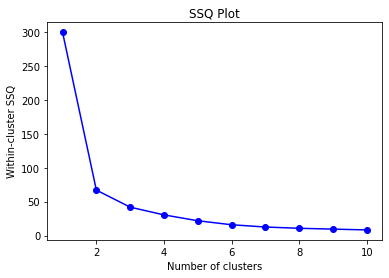

In [5]:
plt.plot(range(1,11), ssq, marker='o', color='blue')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("SSQ Plot")
plt.show()

In [6]:
my_model = KMeans(n_clusters=3, random_state=123)
result= my_model.fit(df_scaled)

# Model Testing

In [7]:
predictions = result.predict(df_scaled)
predictions[:5] 

array([1, 2, 1, 2, 0])

# Deploying Model

In [8]:
pred_new = list(result.predict([[9.3,5.36]]))
pred_new

[1]

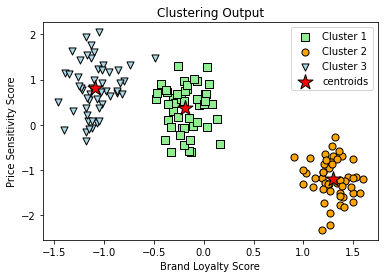

In [9]:
plt.scatter(df_scaled[predictions==0,0], df_scaled[predictions==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='Cluster 1')
plt.scatter(df_scaled[predictions==1,0], df_scaled[predictions==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='Cluster 2')
plt.scatter(df_scaled[predictions==2,0], df_scaled[predictions==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='Cluster 3')
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Brand Loyalty Score")
plt.ylabel("Price Sensitivity Score")
plt.title("Clustering Output")
plt.show()

In [11]:
predictions_relabelled = np.where(predictions==0, "Value Conscious", 
                                  np.where(predictions==1,"Brand Advocates", "Loyal to low cost"))
df['category'] = pd.Series(predictions_relabelled, index=df.index)
df.index.name = "Customer Number"
pd.DataFrame(df).head()

,brand_loyality_score,price_sensitivity_score,category
Customer Number,,,
0,9.310463,5.356477,Brand Advocates
1,1.887756,7.301291,Loyal to low cost
2,9.554102,5.339255,Brand Advocates
3,1.239190,7.775585,Loyal to low cost
4,4.042612,6.993620,Value Conscious
